In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [21]:
posts = pd.read_pickle('./data/all_posts.pickle')
print(len(posts))
posts.head()

1046958


,created_utc,id,author,title,selftext,subreddit,link,score,upvote_ratio,author_flair_text,num_comments,removed_by_category,url,divisiveness
0,1588242127,gat3o9,TransGirl757,"If we get approved by 100k people in 1 month, ...",NaN,progressive,/r/progressive/comments/gat3o9/if_we_get_appro...,1,1.0,NaN,0,moderator,https://petitions.whitehouse.gov/petition/give...,1
1,1588222576,gapbez,shallah,Elizabeth Warren and Alexandria Ocasio-Cortez ...,NaN,progressive,/r/progressive/comments/gapbez/elizabeth_warre...,1,1.0,NaN,0,moderator,https://theweek.com/speedreads/911377/elizabet...,1
2,1588216466,ganw7m,shallah,"Gov Whitmer Announces ""Futures for Frontliners...",NaN,progressive,/r/progressive/comments/ganw7m/gov_whitmer_ann...,1,1.0,NaN,5,NaN,"https://www.michigan.gov/whitmer/0,9309,7-387-...",1
3,1588200464,gajmqr,thinkB4WeSpeak,Could pandemic rekindle labor movement?,NaN,progressive,/r/progressive/comments/gajmqr/could_pandemic_...,1,1.0,NaN,2,NaN,https://finance-commerce.com/2020/04/could-pan...,1
4,1588197018,gaikq1,davyjoneses,Found on r/therightcantmeme. Should the govern...,NaN,progressive,/r/progressive/comments/gaikq1/found_on_rtheri...,1,1.0,NaN,1,moderator,https://np.reddit.com/r/TheRightCantMeme/comme...,1


In [2]:
date = '20200713_20200813'
fname = f'./data/comments/{date}_all_comments_roberta.pickle'
comments = pd.read_pickle(fname)
print(len(comments))
comments.head()

2834240


,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,anger,you,we,swear,civility,personal_attack,third_party_attack,aspersion,vulgarity,stereotype
2,1597373600,t3_i9azph,t3_i9azph,g1eh32p,Gorehog,Damn. Now the dems got my vote.,uspolitics,/r/uspolitics/comments/i9azph/birtherism_again...,1,NaN,...,0,0,0,0,0.003164,0.000097,0.000886,0.000473,0.000303,0.000359
3,1597371202,t3_i9cyd3,t3_i9cyd3,g1ecno4,id10t_you,He’s playing the hits. The dotard devotees wil...,uspolitics,/r/uspolitics/comments/i9cyd3/trump_falsely_cl...,2,NaN,...,0,0,0,0,0.009717,0.000095,0.001041,0.000518,0.000413,0.000553
4,1597370953,t3_i9d0i8,t3_i9d0i8,g1ec7jm,id10t_you,"We want voting rights for *everyone*, regardle...",uspolitics,/r/uspolitics/comments/i9d0i8/trump_economic_a...,1,NaN,...,0,0,0,0,0.049601,0.000107,0.000960,0.001068,0.000409,0.000567
5,1597370775,t3_i9azph,t3_i9azph,g1ebw96,harrynutzach,"Actually, Newsweek started this.... not the Tr...",uspolitics,/r/uspolitics/comments/i9azph/birtherism_again...,-3,NaN,...,1,0,0,0,0.004385,0.000109,0.001074,0.001139,0.000395,0.000214
6,1597369616,t1_g1e9ofi,t3_i9cqjt,g1e9szw,Projectrage,https://youtu.be/o-0lAhnoDlU,uspolitics,/r/uspolitics/comments/i9cqjt/senate_leaves_un...,1,NaN,...,0,0,0,0,0.007214,0.000212,0.001147,0.000595,0.001417,0.000277


In [119]:
comments.columns

Index(['created_utc', 'parent_id', 'link_id', 'id', 'author', 'body',
       'subreddit', 'link', 'score', 'author_flair_text', 'comment_len',
       'compound_sentiment', 'categories', 'i', 'posemo', 'social', 'negemo',
       'sad', 'negate', 'anger', 'you', 'we', 'swear', 'civility',
       'personal_attack', 'third_party_attack', 'aspersion', 'vulgarity',
       'stereotype', 'author_avg_incivility', 'sentiment',
       'parent_id_children', 'breadth', 'op_divisiveness',
       'parent_id_children', 'comment_len_children',
       'author_avg_incivility_children', 'compound_sentiment_children',
       'sentiment_children', 'civility_children'],
      dtype='object')

In [5]:
fname = f'{date}_depths_per_comments'
if os.path.isfile(fname):
    depths = list(np.load(fname))
else:
    indices = list(comments[comments.link_id.str[3:] == comments.parent_id.str[3:]].level_0)
    depths = [0]*len(comments)
    for i in indices:
        depths[i] = 1
comments['depth'] = depths
depths[:10]

AttributeError: 'DataFrame' object has no attribute 'depth'

In [ ]:
id_to_index = dict(zip(comments.id, comments.level_0))
parent_ids = dict(zip(comments.parent_id, comments.id))
def fill_depth(id, depth):
    index = id_to_index[id]
    # print("current search index is " + str(index))
    if depth[index] != 0:
        return
    
    if id in parent_ids.keys() and parent_ids[id] in id_to_index:
        fill_depth(parent_ids[id] , depth)
    elif parent_ids[id] not in id_to_index:
        depth[index] = 1
        return
    depth[index] = depth[id_to_index[parent_ids[id]]]+1
for index, row in comments.iterrows():
    if index % 1000 == 0:
        print(index)
    fill_depth(row['id'], depths)
with open('depths_per_comments', 'wb') as f:
    np.save(f, depths)


In [ ]:
fname = f'{date}_height_per_comments'
if os.path.isfile(fname):
    print("Has in file")
    heights = list(np.load(fname))
else:
    indices = list(comments[~comments.id.isin(comments.parent_id.str[3:])].level_0)
    heights = [-1]*len(comments)
    # for i in indices:
    #     heights[i] = 0
heights[:10]

In [ ]:
from collections import defaultdict
id_to_index = dict(zip(comments.id, comments.level_0))
parent_to_children =  defaultdict(list)
for index, row in comments.iterrows():
    parent_to_children[row['parent_id'][3:]].append(row['id'])

In [135]:
from collections import defaultdict
left_sub = ['BlueMidterm2018', 'politics', 'JoeBiden', 'Libertarian', 'OurPresident', 'PoliticalDiscussion', 'Political_Revolution', 'SandersForPresident', 'VoteBlue', 'hillaryclinton', 'politics', 'progressive']
right_sub = ['AskThe_Donald', 'Conservative', 'ConservativesOnly', 'The_Mueller', 'donaldtrump']
subreddit_learning = defaultdict(int)
for left in left_sub:
    subreddit_learning[left_sub] = 1
for right in right_sub:
    subreddit_learning[right_sub] = 2

NameError: name 'defaultdict' is not defined

In [22]:
# get divisiveness and sentiment extreme
divisive_mapping = dict(zip(posts.id, posts.divisiveness))
comments['op_divisiveness'] = comments['link_id'].str[3:].apply(lambda x: divisive_mapping[x] if x in divisive_mapping else 0)
comments['sentiment'] = comments['compound_sentiment'].abs()
comments.head()

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,personal_attack,third_party_attack,aspersion,vulgarity,stereotype,author_avg_incivility,sentiment,parent_id_children,breadth,op_divisiveness
0,1597369546,t3_i9cqjt,t3_i9cqjt,g1e9ofi,dukeofmadnessmotors,That's the **Republican** Senate that's runnin...,uspolitics,/r/uspolitics/comments/i9cqjt/senate_leaves_un...,1,NaN,...,0.000096,0.001450,0.000913,0.000407,0.000196,0.319571,0.0000,t1_g1e9ofi,1,1
1,1597357094,t3_i98fls,t3_i98fls,g1dm73r,darkon,"AOC was born October 13, 1989, so she's 30 now...",uspolitics,/r/uspolitics/comments/i98fls/will_aoc_be_old_...,3,NaN,...,0.000105,0.000910,0.000457,0.000286,0.000163,0.207634,0.5410,t1_g1dm73r,1,0
2,1597350822,t1_g1d7uw7,t3_i93ysh,g1d8vog,revision0,"Perhaps, but repeated behavior alone indicates...",uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,1,NaN,...,0.000088,0.001481,0.001105,0.000410,0.000198,0.208284,0.8951,t1_g1d8vog,1,1
3,1597350342,t1_g1cynaq,t3_i93ysh,g1d7uw7,DiggSucksNow,&gt; It is more reasonable to suspect Trump fe...,uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,1,NaN,...,0.000101,0.000975,0.001380,0.000393,0.000240,0.180878,0.5136,t1_g1d7uw7,1,1
4,1597346120,t3_i93ysh,t3_i93ysh,g1cynaq,revision0,I believe the public is being actively encoura...,uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,3,NaN,...,0.000092,0.001130,0.001130,0.000440,0.000210,0.208284,0.7025,t1_g1cynaq,1,1


In [6]:
# get user average incivility
authors = comments.groupby('author').mean()
authors = authors.reset_index()
author_avg = dict(zip(authors.author, authors.civility))

comments['author_avg_incivility'] = comments['author'].map(author_avg)

In [9]:
breath = comments.groupby('parent_id').count()['created_utc'].reset_index()
breath['id'] = breath['parent_id'].str[3:]
breath.columns = ['parent_id', 'breadth', 'id']
comments = comments.merge(breath, how='inner', on="id", suffixes=(None, "_children"))
del breath
comments.hist('breadth')

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,civility,personal_attack,third_party_attack,aspersion,vulgarity,stereotype,author_avg_incivility,sentiment,parent_id_children,breadth
0,1597369546,t3_i9cqjt,t3_i9cqjt,g1e9ofi,dukeofmadnessmotors,That's the **Republican** Senate that's runnin...,uspolitics,/r/uspolitics/comments/i9cqjt/senate_leaves_un...,1,NaN,...,0.004379,0.000096,0.001450,0.000913,0.000407,0.000196,0.319571,0.0000,t1_g1e9ofi,1
1,1597357094,t3_i98fls,t3_i98fls,g1dm73r,darkon,"AOC was born October 13, 1989, so she's 30 now...",uspolitics,/r/uspolitics/comments/i98fls/will_aoc_be_old_...,3,NaN,...,0.005674,0.000105,0.000910,0.000457,0.000286,0.000163,0.207634,0.5410,t1_g1dm73r,1
2,1597350822,t1_g1d7uw7,t3_i93ysh,g1d8vog,revision0,"Perhaps, but repeated behavior alone indicates...",uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,1,NaN,...,0.007962,0.000088,0.001481,0.001105,0.000410,0.000198,0.208284,0.8951,t1_g1d8vog,1
3,1597350342,t1_g1cynaq,t3_i93ysh,g1d7uw7,DiggSucksNow,&gt; It is more reasonable to suspect Trump fe...,uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,1,NaN,...,0.005927,0.000101,0.000975,0.001380,0.000393,0.000240,0.180878,0.5136,t1_g1d7uw7,1
4,1597346120,t3_i93ysh,t3_i93ysh,g1cynaq,revision0,I believe the public is being actively encoura...,uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,3,NaN,...,0.006413,0.000092,0.001130,0.001130,0.000440,0.000210,0.208284,0.7025,t1_g1cynaq,1


In [120]:
# get the mean children scores
metrics = comments.groupby('parent_id').mean()[['comment_len', 'author_avg_incivility', 'compound_sentiment', 'sentiment', 'civility', 'i', 'we', 'you']].reset_index()
metrics['id'] = metrics['parent_id'].str[3:]
comments = comments.merge(metrics, how='inner', on="id", suffixes=(None, "_children"))
del metrics
comments.head()

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,civility_children,parent_id_children,comment_len_children,author_avg_incivility_children,compound_sentiment_children,sentiment_children,civility_children,i_children,we_children,you_children
0,1597346120,t3_i93ysh,t3_i93ysh,g1cynaq,revision0,I believe the public is being actively encoura...,uspolitics,/r/uspolitics/comments/i93ysh/trumps_attack_on...,3,NaN,...,0.005927,t1_g1cynaq,88.0,0.180878,0.5136,0.5136,0.005927,0.0,0.0,0.0
1,1597342022,t1_g1bmz8j,t3_i8mjdg,g1cpkrp,Designer_Dog,10 bucks says there won't be any live Biden/Tr...,uspolitics,/r/uspolitics/comments/i8mjdg/kamala_harris_sa...,1,NaN,...,0.002559,t1_g1cpkrp,5.0,0.209078,-0.2500,0.2500,0.002559,0.0,0.0,0.0
2,1597323320,t1_g19nm1e,t3_i8mjdg,g1bmz8j,jcooli09,It's hilarious that you think either Trump or ...,uspolitics,/r/uspolitics/comments/i8mjdg/kamala_harris_sa...,1,NaN,...,0.004694,t1_g1bmz8j,10.0,0.253766,0.0000,0.0000,0.004694,0.0,0.0,0.0
3,1597293446,t1_g1anesj,t3_i8j6px,g1anyrk,b_m_hart,He won't be able to. They've spent the last 3...,uspolitics,/r/uspolitics/comments/i8j6px/majority_republi...,4,NaN,...,0.012562,t1_g1anyrk,42.0,0.196366,0.6124,0.6124,0.012562,0.0,0.0,1.0
4,1597293060,t1_g1aezwe,t3_i8j6px,g1anesj,EvidentlyEmpirical,Then please tell me when the Democrats have ab...,uspolitics,/r/uspolitics/comments/i8j6px/majority_republi...,4,NaN,...,0.997492,t1_g1anesj,38.0,0.293031,0.0000,0.0000,0.997492,0.0,0.0,0.0


LINEAR REGRESSION

In [121]:
tlc = comments[comments.link_id.str[3:] == comments.parent_id.str[3:]]

In [122]:
comments[comments.parent_id.str[3:].isin(tlc.id)]

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,civility_children,parent_id_children,comment_len_children,author_avg_incivility_children,compound_sentiment_children,sentiment_children,civility_children,i_children,we_children,you_children
2,1597323320,t1_g19nm1e,t3_i8mjdg,g1bmz8j,jcooli09,It's hilarious that you think either Trump or ...,uspolitics,/r/uspolitics/comments/i8mjdg/kamala_harris_sa...,1,NaN,...,0.004694,t1_g1bmz8j,10.0,0.253766,0.00000,0.00000,0.004694,0.0,0.0,0.0
7,1597287508,t1_g19zckl,t3_i8j6px,g1aejks,booi,Nope and if you believe that you drank more of...,uspolitics,/r/uspolitics/comments/i8j6px/majority_republi...,6,NaN,...,0.011437,t1_g1aejks,4.0,0.026510,0.00000,0.00000,0.011437,0.0,0.0,0.0
23,1597239137,t1_g17h9lk,t3_i8969t,g17nci9,spectre1210,&gt; She actually says that this will not affe...,uspolitics,/r/uspolitics/comments/i8969t/iowa_postal_work...,1,NaN,...,0.059041,t1_g17nci9,32.0,0.221321,0.11600,0.41200,0.059041,0.5,0.0,1.5
25,1597236492,t1_g16xu9p,t3_i8969t,g17j5x2,-ThePhallus-,And yet everyone in the media and everyone onl...,uspolitics,/r/uspolitics/comments/i8969t/iowa_postal_work...,1,NaN,...,0.174304,t1_g17j5x2,16.0,0.189305,0.31820,0.31820,0.342751,0.0,0.0,0.0
40,1597195637,t1_g161r7w,t3_i7zsdo,g1626j2,SamDemosthenes,how long have you been a right-winger?,uspolitics,/r/uspolitics/comments/i7zsdo/organized_crimin...,1,NaN,...,0.003334,t1_g1626j2,12.0,0.121478,0.00000,0.00000,0.003334,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449716,1594619685,t1_fxwj9bt,t3_hq9b7y,fxwk4j3,lbmn,&gt; Voting for Jo Jorgensen you are also voti...,Libertarian,/r/Libertarian/comments/hq9b7y/give_me_a_reaso...,1,NaN,...,0.663652,t1_fxwk4j3,25.0,0.216411,-0.15135,0.16685,0.496756,0.0,0.0,1.0
449732,1594616602,t1_fxwck9w,t3_hq8gaj,fxwgeek,Zhellblah,&gt;people are moral\n\nThis is the major flaw...,Libertarian,/r/Libertarian/comments/hq8gaj/questions_about...,1,NaN,...,0.010206,t1_fxwgeek,36.0,0.273957,0.66505,0.66505,0.010206,0.5,0.0,0.5
449747,1594614592,t1_fxwcoo4,t3_hq7ojf,fxwdsf7,Jober36,It was in another comment and perhaps I should...,Libertarian,/r/Libertarian/comments/hq7ojf/blm/fxwdsf7/,1,NaN,...,0.009994,t1_fxwdsf7,3.0,0.158740,-0.29110,0.29110,0.009994,0.0,0.0,0.0
449750,1594614135,t1_fxwbryb,t3_hq8br8,fxwd644,monsterpoodle,I agree in principle but things like the COVID...,Libertarian,/r/Libertarian/comments/hq8br8/why_i_struggle_...,1,NaN,...,0.015034,t1_fxwd644,43.0,0.158740,0.93440,0.93440,0.015034,0.0,0.0,2.0


In [123]:
# author_avg_incivility_children, compound_sentiment
Xs = ['comment_len', 'sentiment', 'third_party_attack', 'personal_attack', 'aspersion', 'vulgarity', 'stereotype', 'civility',
       'op_divisiveness', 'score']
# Ys= ['comment_len_children', 'compound_sentiment_children', 'sentiment_children', 'incivility_children', 'breadth', 'incivility_all', 'max_depth', 'total_count']
Ys= ['civility_children', 'breadth', 'i_children', 'you_children', 'we_children']

In [124]:
Xdf = tlc[Xs + Ys]
corr = Xdf.corr(method ='pearson')
corr[corr > 0.1]

,comment_len,sentiment,third_party_attack,personal_attack,aspersion,vulgarity,stereotype,civility,op_divisiveness,score,civility_children,civility_children,breadth,i_children,you_children,we_children
comment_len,1.000000,0.338933,NaN,NaN,0.163432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108273,NaN
sentiment,0.338933,1.000000,0.129550,NaN,0.204330,0.176534,NaN,0.157794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
third_party_attack,NaN,0.129550,1.000000,NaN,0.267410,0.255557,0.179694,0.476028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_attack,NaN,NaN,NaN,1.000000,0.104626,0.163200,NaN,0.237267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspersion,0.163432,0.204330,0.267410,0.104626,1.000000,0.287826,0.130874,0.388385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vulgarity,NaN,0.176534,0.255557,0.163200,0.287826,1.000000,NaN,0.476697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stereotype,NaN,NaN,0.179694,NaN,0.130874,NaN,1.000000,0.220631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
civility,NaN,0.157794,0.476028,0.237267,0.388385,0.476697,0.220631,1.000000,NaN,NaN,0.137416,0.128303,NaN,NaN,NaN,NaN
op_divisiveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.390982,NaN,NaN,NaN


9.786391780659882 0.0


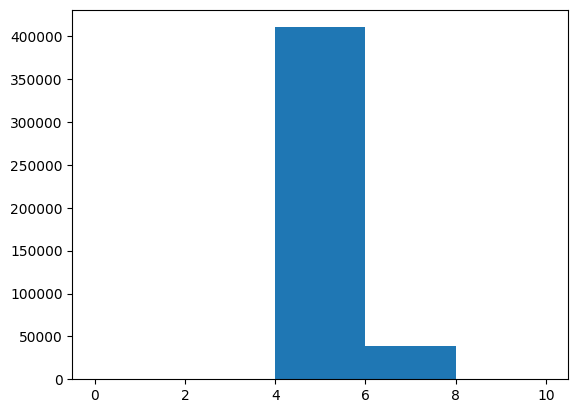

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

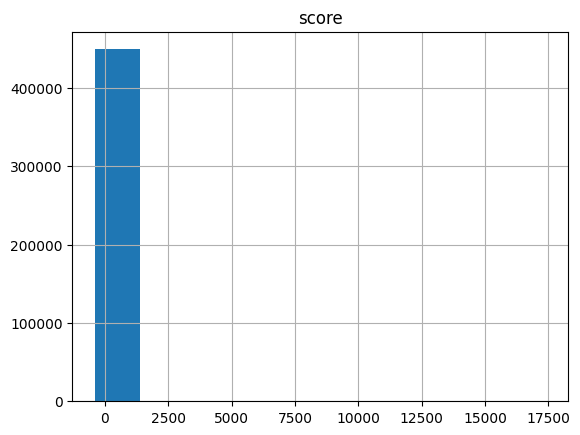

In [125]:
def logTransform(df, column_name):
    return np.log(df[column_name] + 1 - min(df[column_name]))
def draw_histogram(column):
    maximum, minimum = max(column), min(column)
    print(maximum, minimum)
    bin_width = int((maximum - minimum) / 5) + 1
    plt.hist(column, bins=np.arange(minimum, maximum + bin_width, bin_width))
    plt.show()
draw_histogram(logTransform(comments, 'score'))
comments.hist('score')

In [126]:
from sklearn import preprocessing


# continuous_columns = ['comment_len', 'compound_sentiment', 'third_party_attacks', 'personal_attacks', 'aspersion', 'vulgarity', 'stereotype', 'incivility', 'social', 'you',
#        'i', 'posemo', 'negate', 'negemo', 'anger', 'swear', 'sad', 'we', 'score']
continuous_columns = ['comment_len', 'sentiment', 'third_party_attack', 'personal_attack', 'aspersion', 'vulgarity', 'stereotype', 'civility', 'score']
for column in continuous_columns:
    Xdf[column] = logTransform(Xdf, column)
scaler = preprocessing.StandardScaler()
Xdf[continuous_columns] = scaler.fit_transform(Xdf[continuous_columns])
Xdf

/home/yujia/miniconda3/envs/incivility/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yujia/miniconda3/envs/incivility/lib/python3.7/site-packages/pandas/core/frame.py:3699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[iloc] = igetitem(value, i)


,comment_len,sentiment,third_party_attack,personal_attack,aspersion,vulgarity,stereotype,civility,op_divisiveness,score,civility_children,civility_children,breadth,i_children,you_children,we_children
0,2.663554,0.822443,-0.306837,-0.196627,-0.378612,-0.373180,-0.186208,-0.612621,1,-0.184332,0.005927,0.005927,1,0.0,0.0,0.0
8,-0.798072,-1.582817,-0.307833,-0.196532,-0.381923,-0.373815,-0.186421,-0.613624,1,-0.248648,0.981553,0.981553,1,0.0,3.0,0.0
9,-0.241321,-0.121000,-0.307654,-0.196449,-0.380780,-0.373411,-0.186389,0.071535,1,-0.232465,0.990602,0.990602,1,0.0,1.0,0.0
26,0.321058,0.727190,-0.307313,-0.196396,2.995997,-0.373276,-0.185145,1.816484,1,-0.216352,0.120518,0.120518,4,0.0,1.0,7.0
28,-1.601254,0.419771,-0.307171,-0.196234,-0.017067,2.750876,-0.182447,1.929823,1,-0.216352,0.005477,0.005477,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449743,1.223115,0.231601,-0.278004,-0.196225,-0.027223,-0.373072,-0.185004,-0.355502,1,-0.216352,0.012832,0.018127,2,3.0,5.0,1.0
449754,0.437605,-1.582817,-0.308400,-0.195870,-0.382300,-0.373377,-0.186596,-0.611686,0,-0.216352,0.007371,0.007371,1,0.0,0.0,0.0
449755,1.828928,1.380015,-0.307331,-0.195835,-0.378410,-0.373502,-0.186027,-0.611102,1,-0.216352,0.009347,0.009347,2,0.0,0.0,0.0
449760,-0.416381,1.099219,-0.308520,-0.196556,-0.379019,-0.373925,-0.186254,-0.624977,1,-0.216352,0.009897,0.009897,1,0.0,1.0,0.0


In [134]:
import statsmodels.formula.api as smf

baseX = 'comment_len + sentiment + vulgarity + third_party_attack + personal_attack + aspersion + stereotype  + civility + op_divisiveness + score'
breadth = f'breadth ~ {baseX}'

mod = smf.ols(formula=breadth, data=Xdf)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                breadth   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:56:53   Log-Likelihood:            -2.8390e+05
No. Observations:               84517   AIC:                         5.678e+05
Df Residuals:                   84506   BIC:                         5.679e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.6611      0

In [132]:
baseX = 'comment_len + sentiment + third_party_attack + personal_attack + aspersion + vulgarity + stereotype  + civility + op_divisiveness + score'
breadth = f'breadth ~ {baseX}'

mod = smf.ols(formula=breadth, data=Xdf)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                breadth   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:55:44   Log-Likelihood:            -2.8390e+05
No. Observations:               84517   AIC:                         5.678e+05
Df Residuals:                   84506   BIC:                         5.679e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.6611      0